# Visualization

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from helpers import load_data, body_movement_code

/Users/Geoffrey/pison/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
dataset = load_data()

Trimming observations to 967 samples


### Global Data Plots

Plot each body motion repetition individually to get a sense for the type of data we are dealing with.  Plots are roughly labeled according to the motion type, repetition, and data source.


<IPython.core.display.Javascript object>


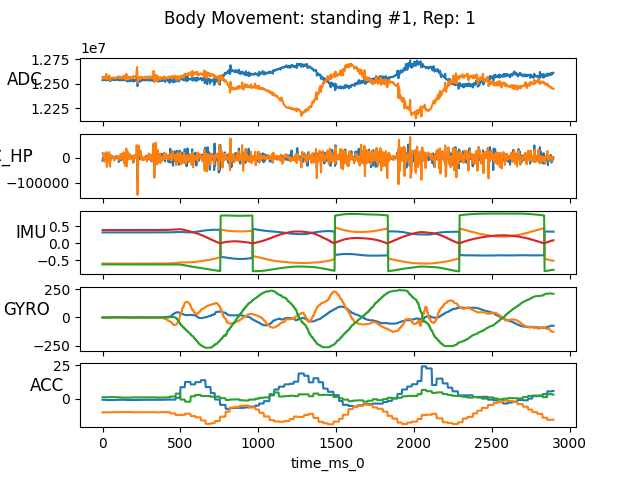

<IPython.core.display.Javascript object>


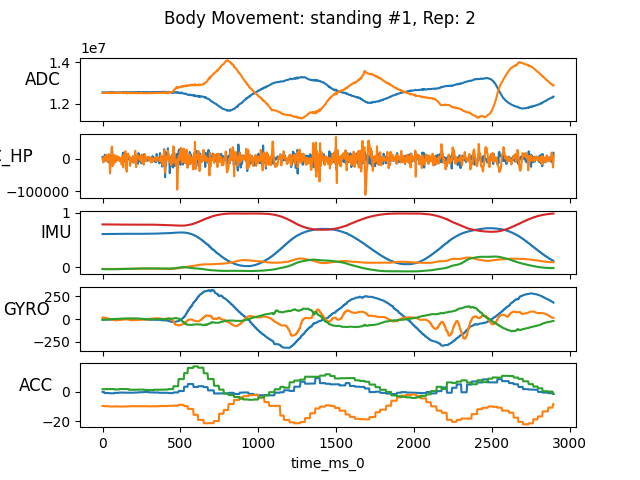

<IPython.core.display.Javascript object>


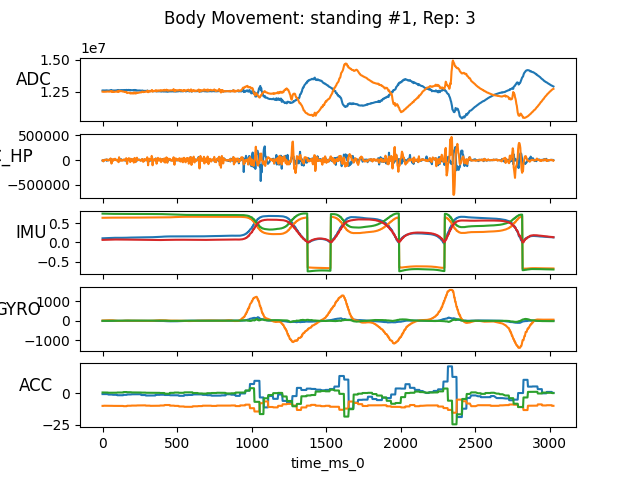

<IPython.core.display.Javascript object>


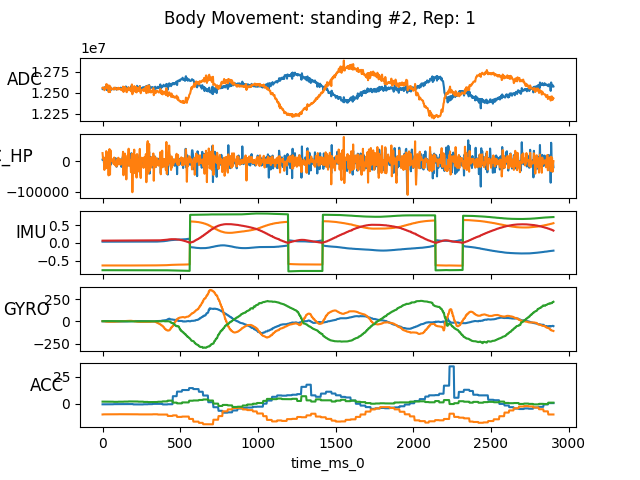

<IPython.core.display.Javascript object>


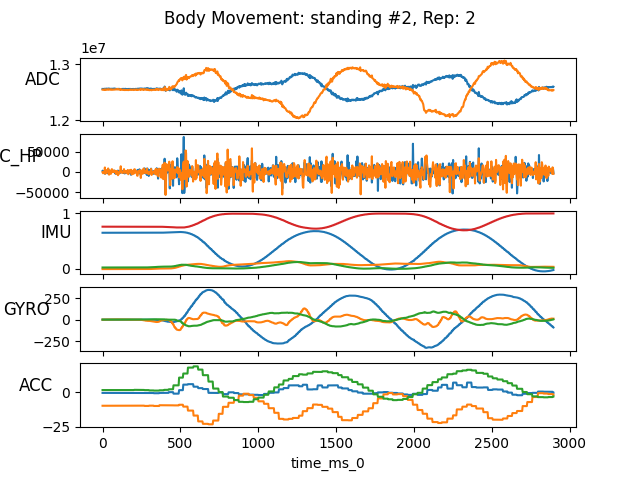

<IPython.core.display.Javascript object>


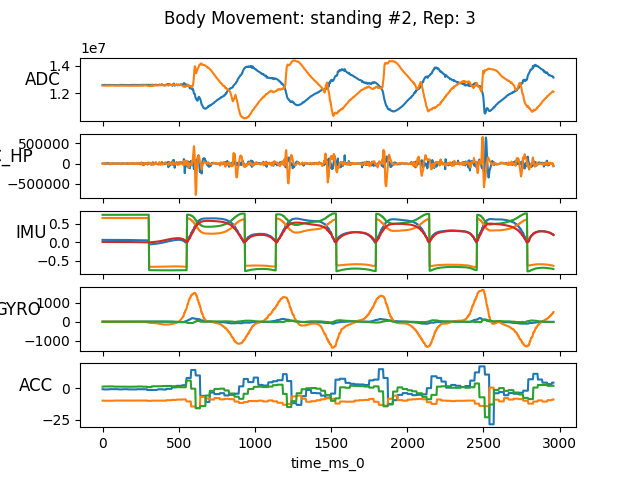

<IPython.core.display.Javascript object>


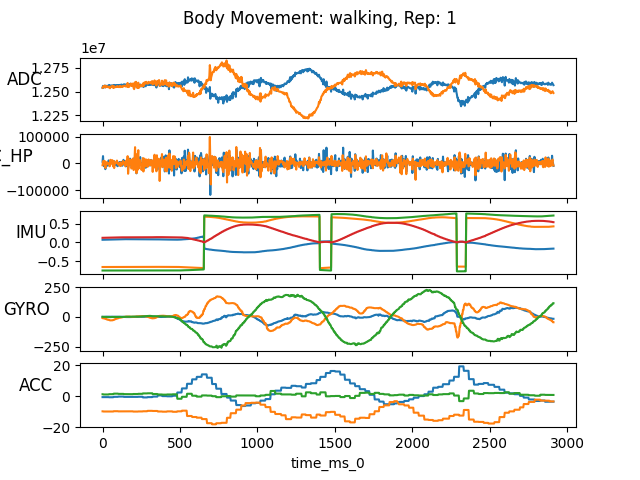

<IPython.core.display.Javascript object>


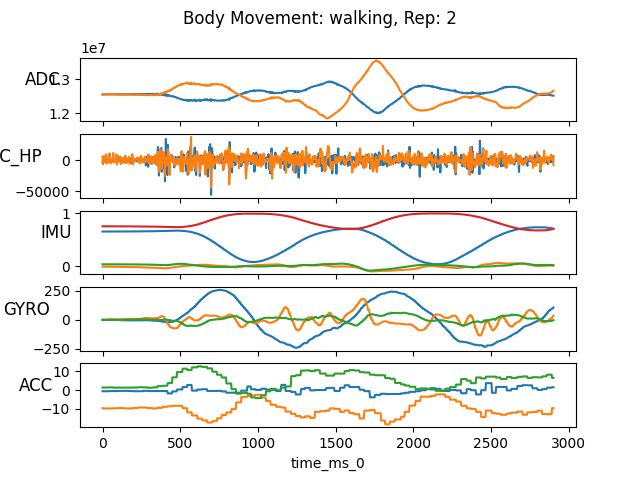

<IPython.core.display.Javascript object>


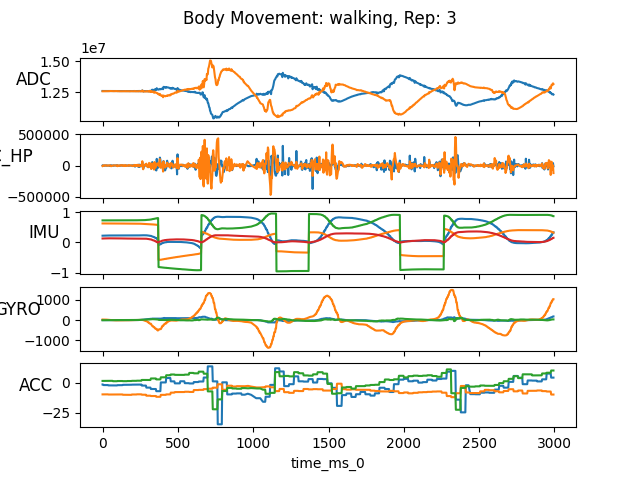

<IPython.core.display.Javascript object>


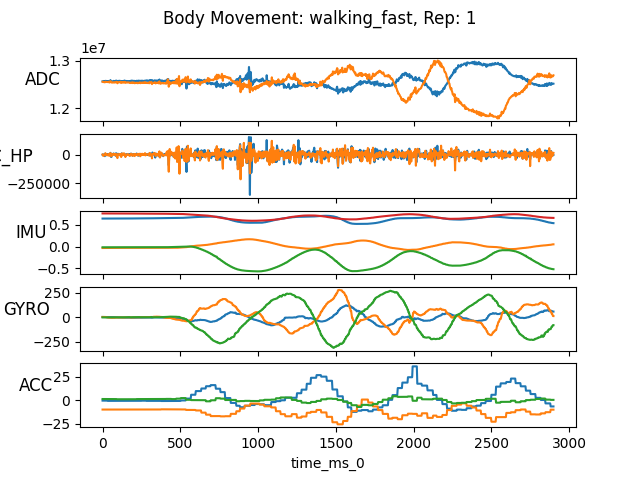

<IPython.core.display.Javascript object>


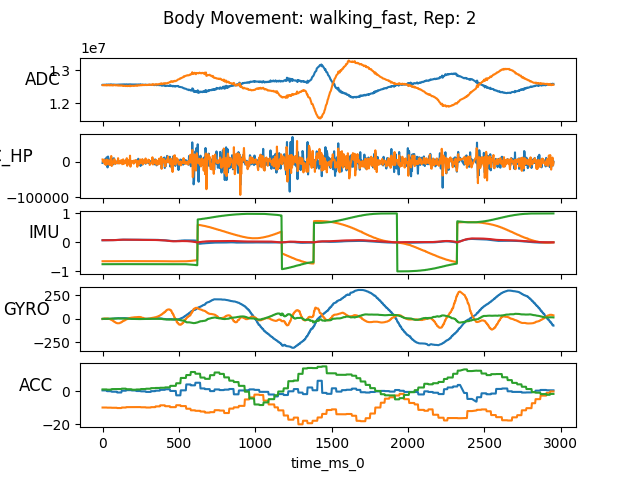

<IPython.core.display.Javascript object>


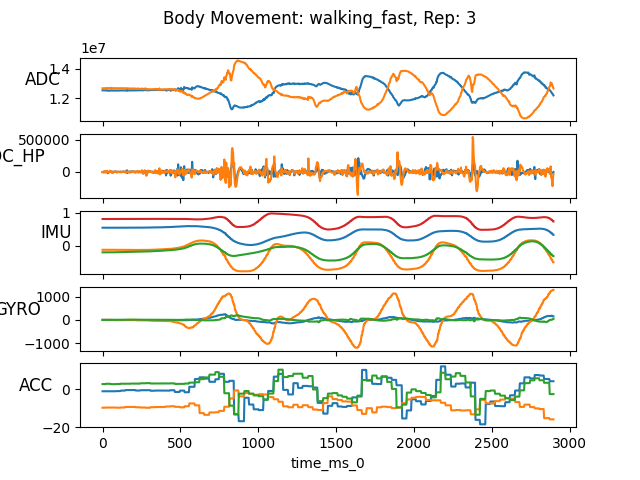

<IPython.core.display.Javascript object>


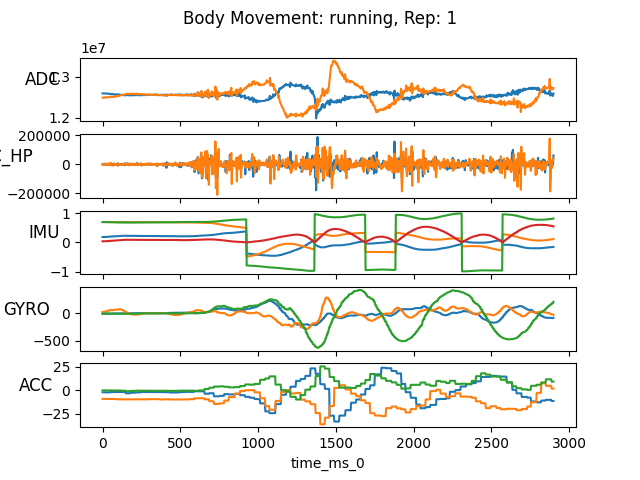

<IPython.core.display.Javascript object>


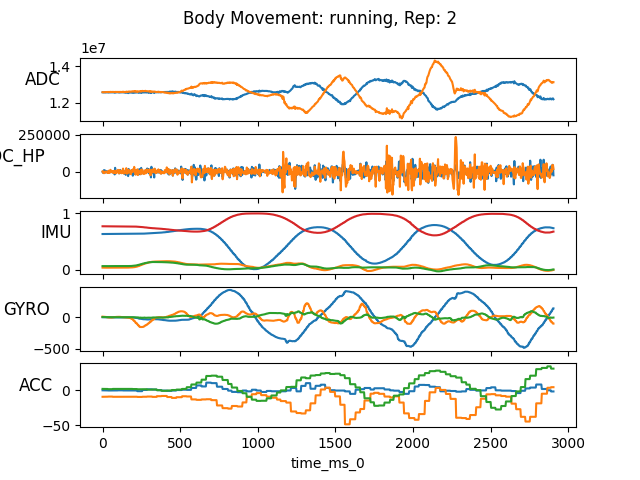

<IPython.core.display.Javascript object>


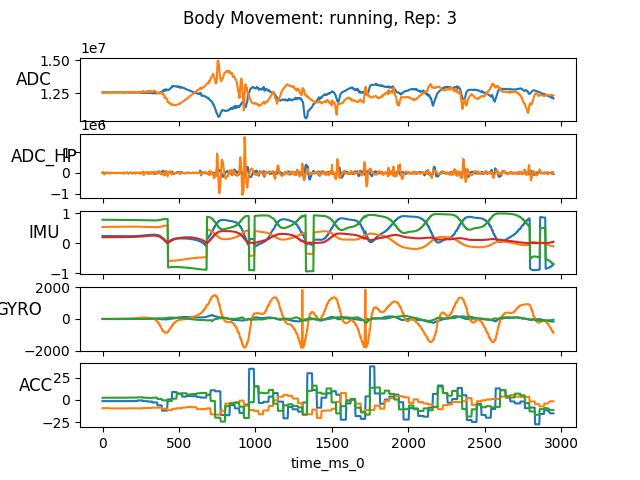

In [5]:
data_groups = [['ch0', 'ch1'], ['ch0_hp', 'ch1_hp'], ['qx', 'qy', 'qz', 'qw'], ['gx', 'gy', 'gz'], ['ax', 'ay', 'az']]
sensors = ['ADC', 'ADC_HP', 'IMU', 'GYRO', 'ACC']

for body_label, rep in dataset.index.unique():
    fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True)
    fig.suptitle(f'Body Movement: {body_movement_code[body_label]}, Rep: {rep}')
    for group_idx, data_group in enumerate(data_groups):
        axes[group_idx].set_ylabel(sensors[group_idx], rotation=0, size='large')
        dataset.loc[(body_label, rep), 'time_ms_0'] = dataset.loc[(body_label, rep), 'time_ms'] - dataset.loc[(body_label, rep), 'time_ms'].min()
        # Create a new x axis that is time starting from zero to get a better sense of duration
        dataset.loc[(body_label, rep)].plot(x='time_ms_0', y=data_group, ax=axes[group_idx], legend=False)

plt.show()

## Preliminary Observations

### Movement impact on sensor information
As movements increase, dynamics sensors become less reliable and much more distorted, but patterns in high passed ADC data remain somewhat consistent.  For instance in running rep 3, there is a nice pulse train formed in the high passed data that roughly corresponds to the start of IMU pulses.

### Time scale of information
Human reaction times range anywhere from 150 - 350 milliseconds and a runner with a somewhat higher cadence gait may approach or surpass up to 200 steps per minute, which corresponds to roughly 300 milliseconds between strides.  Therefore, the time windows between new neurological and physiological events should roughly inhabit this quarter of a second interval at the most extreme.  This will likely be a parameter chosen wisely during feature selection.